In [0]:
!python3 train.py --epochs 300 --weights weights/last.pt --batch-size 16 --img-size 128

Namespace(accumulate=1, adam=False, arc='defaultpw', batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-tiny.cfg', data='data/coco.data', device='', epochs=300, evolve=False, img_size=128, img_weights=False, multi_scale=False, name='', nosave=False, notest=False, prebias=False, rect=False, resume=False, transfer=False, var=None, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Reading labels (1123 found, 0 missing, 25 empty for 1148 images): 100% 1148/1148 [00:00<00:00, 1273.31it/s]
Model Summary: 37 layers, 8.66988e+06 parameters, 8.66988e+06 gradients
Starting training for 300 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   200/299    0.247G     0.198     0.223         0      0.42        28       128: 100% 72/72 [00:04<00:00, 16.57it/s]
               Class    Images   Targets         P         R       mAP        F1: 100% 8/8 [00:01<00:00,  4.31it/s]
                 a

In [1]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import random
 
trainval_percent = 0.1
train_percent = 0.9
xmlfilepath = 'data/Annotations'
txtsavepath = 'data/images'
total_xml = os.listdir(xmlfilepath)
 
num = len(total_xml)
list = range(num)
tv = int(num * trainval_percent)
tr = int(tv * train_percent)
trainval = random.sample(list, tv)
train = random.sample(trainval, tr)
 
ftrainval = open('data/ImageSets/trainval.txt', 'w')
ftest = open('data/ImageSets/test.txt', 'w')
ftrain = open('data/ImageSets/train.txt', 'w')
fval = open('data/ImageSets/val.txt', 'w')

a=0
for i in list:
    a+=1
    name = total_xml[i][:-4] + '\n'
    if i in trainval:
        ftrainval.write(name)
        if i in train:
            ftest.write(name)
        else:
            fval.write(name)
    else:
        ftrain.write(name)
        
print(a)
ftrainval.close()
ftrain.close()
fval.close()
ftest.close()

1234


In [0]:
import xml.etree.ElementTree as ET
import pickle
import os
from os import listdir, getcwd
from os.path import join
 
sets = ['train', 'test','val']
 
classes = ["light"]
 
def convert(size, box):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def convert_annotation(image_id):
    in_file = open('data/Annotations/%s.xml' % (image_id))
    out_file = open('data/labels/%s.txt' % (image_id), 'w')
    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)
 
    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult) == 1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text),
             float(xmlbox.find('ymax').text))
        bb = convert((w, h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')
 
 
wd = getcwd()
print(wd)
for image_set in sets:
    if not os.path.exists('data/labels/'):
        os.makedirs('data/labels/')
    image_ids = open('data/ImageSets/%s.txt' % (image_set)).read().strip().split()
    list_file = open('data/%s.txt' % (image_set), 'w')
    for image_id in image_ids:
        list_file.write('data/images/%s.jpg\n' % (image_id))
        convert_annotation(image_id)
    list_file.close()

/content/gdrive/My Drive/yolov3


In [2]:
%cd /content/gdrive/My Drive/yolov3
!ls

/content/gdrive/My Drive/yolov3
 cfg		  imgoutsun	  outputsun	     test.py
 data		  LICENSE	  __pycache__	     train.py
 detect1.py	  maketxt.ipynb   README.md	     train_s.ipynb
 detect.py	  models.py	  requirements.txt   txtoutput2
 Dockerfile	  output	  results.json	     txtoutput3
 examples.ipynb   output1	  results.png	     utils
 imgoutput1	 'output (1)'	  results.txt	     voc2txt.ipynb
 imgoutput2	  output2	  runs		     weights
 imgoutrain	  output3	  test_batch0.jpg


In [13]:

!python detect1.py --data data/coco.data --cfg cfg/yolov3-tiny.cfg --weights weights/best.pt  --img-size 128


Namespace(cfg='cfg/yolov3-tiny.cfg', conf_thres=0.3, data='data/coco.data', fourcc='mp4v', half=False, img_size=128, nms_thres=0.5, output='output', source='data/samples', weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

image 1/760 data/samples/4000.jpg: 128x128 2 lights, Done. (0.022s)
image 2/760 data/samples/4001.jpg: 128x128 2 lights, Done. (0.012s)
image 3/760 data/samples/4002.jpg: 128x128 2 lights, Done. (0.012s)
image 4/760 data/samples/4003.jpg: 128x128 2 lights, Done. (0.010s)
image 5/760 data/samples/4004.jpg: 128x128 2 lights, Done. (0.010s)
image 6/760 data/samples/4005.jpg: 128x128 2 lights, Done. (0.019s)
image 7/760 data/samples/4006.jpg: 128x128 2 lights, Done. (0.011s)
image 8/760 data/samples/4007.jpg: 128x128 1 lights, Done. (0.008s)
image 9/760 data/samples/4008.jpg: 128x128 1 lights, Done. (0.008s)
image 10/760 data/samples/4009.jpg: 128x128 Done. (0.003s)
image 11/760 data/samples/4010.jpg: 128x128 1 lig

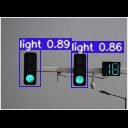

In [0]:
from IPython.display import Image, clear_output 
Image(filename='output/821.jpg', width=300)

In [0]:
import os
import shutil 
for root,dirs,files in os.walk('./output/'):
    for name in files:
        if name[-3:] == 'txt':
            path = os.path.join(root,name)
            shutil.copyfile(path, './txtoutput/'+name[:-8]+'.txt')

In [0]:
import os
import shutil 
for root,dirs,files in os.walk('./output/'):
    for name in files:
        if name[-3:] == 'jpg':
            path = os.path.join(root,name)
            shutil.copyfile(path, './imgoutrain/'+name)

In [0]:
import cv2
from pylab import *
htitch= np.hstack((img1, img3,img4))
vtitch = np.vstack((img1, img3))
cv2.imshow("test1",htitch)
cv2.imshow("test2",vtitch)